We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.linear_model import LogisticRegression

Data contains; 

age - age in years 

sex - (1 = male; 0 = female) 

cp - chest pain type 

trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

chol - serum cholestoral in mg/dl 

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg - resting electrocardiographic results 

thalach - maximum heart rate achieved 

exang - exercise induced angina (1 = yes; 0 = no) 

oldpeak - ST depression induced by exercise relative to rest 

slope - the slope of the peak exercise ST segment 

ca - number of major vessels (0-3) colored by flourosopy 

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 

target - have disease or not (1=yes, 0=no)

In [2]:
df = pd.read_csv ('/Users/leechen/Desktop/data_science_practice_project_1/Heart.csv')
df2 = pd.read_csv('/Users/leechen/Desktop/data_science_practice_project_1/heart 2.csv')

In [3]:
#. merging both data frames 
heart_df = pd.merge(df, df2)

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
301,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
302,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
303,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
304,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# most columns are integers and we have old peak column is a float
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 304
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       305 non-null    int64  
 1   sex       305 non-null    int64  
 2   cp        305 non-null    int64  
 3   trestbps  305 non-null    int64  
 4   chol      305 non-null    int64  
 5   fbs       305 non-null    int64  
 6   restecg   305 non-null    int64  
 7   thalach   305 non-null    int64  
 8   exang     305 non-null    int64  
 9   oldpeak   305 non-null    float64
 10  slope     305 non-null    int64  
 11  ca        305 non-null    int64  
 12  thal      305 non-null    int64  
 13  target    305 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.7 KB


In [7]:
# 305 rows and 14 columns
heart_df.shape

(305, 14)

In [8]:
# no null values present
heart_df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 1) How many are suffering from heart disease? plot the stats and include conclusion statement at the end

In [9]:
count_no_disease = len(heart_df[heart_df.target == 0])
count_have_disease = len(heart_df[heart_df.target == 1])
print("Percentage of Patients without heart disease: {:.2f}%".format((count_no_disease / (len(heart_df.target))*100)))
print("Percentage of Patients have heart disease: {:.2f}%".format((count_have_disease / (len(heart_df.target))*100)))

Percentage of Patients without heart disease: 45.25%
Percentage of Patients have heart disease: 54.75%


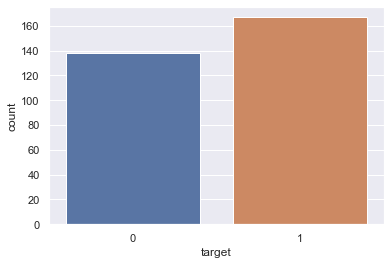

In [10]:
sns.countplot(x="target", data=heart_df, palette="deep")
plt.show()

In our count plot above we see about 165 people are suffering from heart disease in a sample poof of 304. About 138 people are not suffering from heart disease.

# How many males and females have heart disease? 

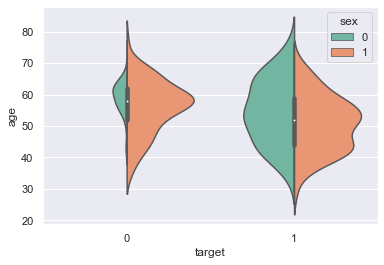

In [11]:
ax = sns.violinplot(x="target", y="age", hue="sex",
                        data=heart_df, palette="Set2", split=True,
                        scale="count")

In [12]:
count_female = len(heart_df[heart_df.sex == 0])
count_male = len(heart_df[heart_df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((count_female / (len(heart_df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_male / (len(heart_df.sex))*100)))

Percentage of Female Patients: 31.48%
Percentage of Male Patients: 68.52%


The above graph shows more men are suffering from heart disease than women. Perhaps men food intake are more than women which makes men more succeptable to having heart disease. Notice about 68% of men and about 31% of women are suffering from heart disease. In the same graph more women don't have heart disease as compared to men.

# Create a visual representation of the frequency distribution of the thalach variable and find the heart rate and heart disease relation? Run various statistical tests to provide a conclusion.

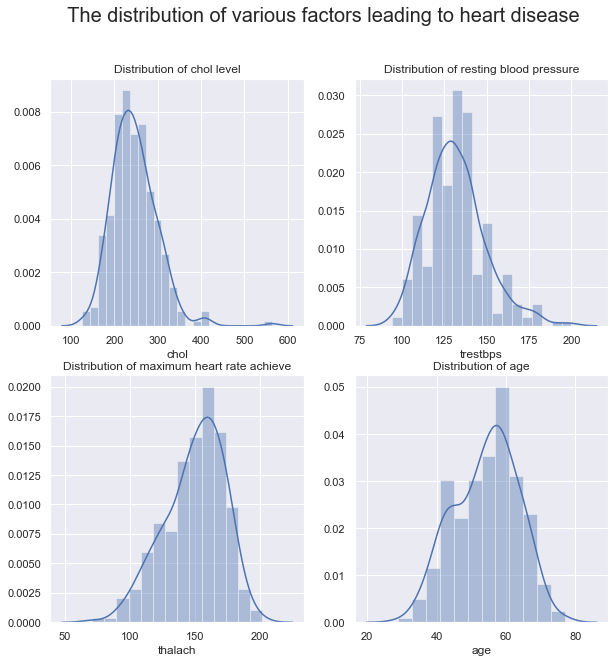

In [13]:
# Factors that may lead to heart disease.
fig,ax = plt.subplots(2,2, figsize=(10,10)) # 'ax' has references to all the four axes
plt.suptitle(" The distribution of various factors leading to heart disease", fontsize=20)
sns.distplot(heart_df['chol'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of chol level')
sns.distplot(heart_df['trestbps'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of resting blood pressure')
sns.distplot(heart_df['thalach'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of maximum heart rate achieve')
sns.distplot(heart_df['age'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of age')
plt.show()

It seems those with high maximum heart and above age 40 seems to have heart disease than people below the age of 40

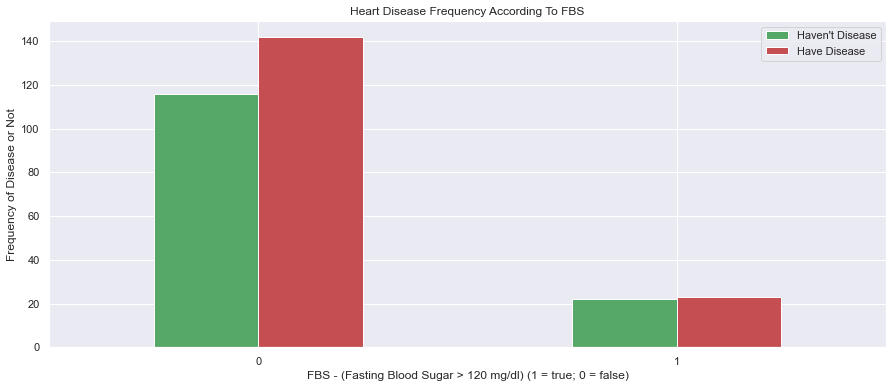

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['g','r' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In our FBS chart above, those with heart disease have FBS way above 120. And those without heart disease have FBS below 120.

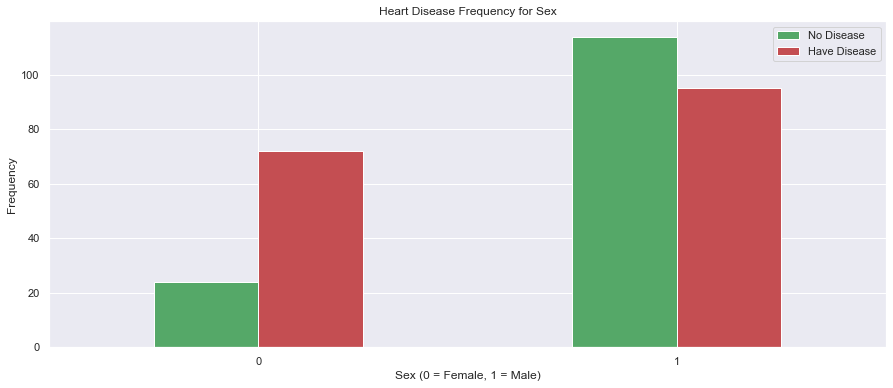

In [15]:
pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(15,6),color=['g','r' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Men tend to have more heart disease than women. Perhaps this data is male dominant.

In [16]:
# lets look at the male and female count. We have 209 males and 96 females
heart_df.groupby(['sex']).agg(['count'])

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,count,count,count,count,count,count,count,count,count,count,count,count,count
sex,,,,,,,,,,,,,
0,96,96,96,96,96,96,96,96,96,96,96,96,96
1,209,209,209,209,209,209,209,209,209,209,209,209,209


In [17]:
heart_df.thalach.describe()

count    305.000000
mean     149.800000
std       22.907623
min       71.000000
25%      134.000000
50%      153.000000
75%      167.000000
max      202.000000
Name: thalach, dtype: float64

The maximum heart rate achieved shows our mean at 149, minimum at 71 and max at 202. In our 75% percentile falls around 167

In [18]:
disease_yes = heart_df[(heart_df['target'] == 1)]

disease_no = heart_df[(heart_df['target'] == 0)]

In [19]:
# Our Skewness is good, but Krutosis is out of range therefore we will not continue with the T-test.
print(stats.describe(disease_yes['thalach']))
print(stats.describe(disease_no['thalach']))

DescribeResult(nobs=167, minmax=(96, 202), mean=158.64071856287424, variance=365.73760911911114, skewness=-0.7203179484446098, kurtosis=0.4346434941567825)
DescribeResult(nobs=138, minmax=(71, 195), mean=139.1014492753623, variance=510.7049613879192, skewness=-0.2935472748025849, kurtosis=-0.23176522769519403)


# 3  Find correlation matrix for all the variables with target. Find Mean, Min & Max of age and plot its distribution.

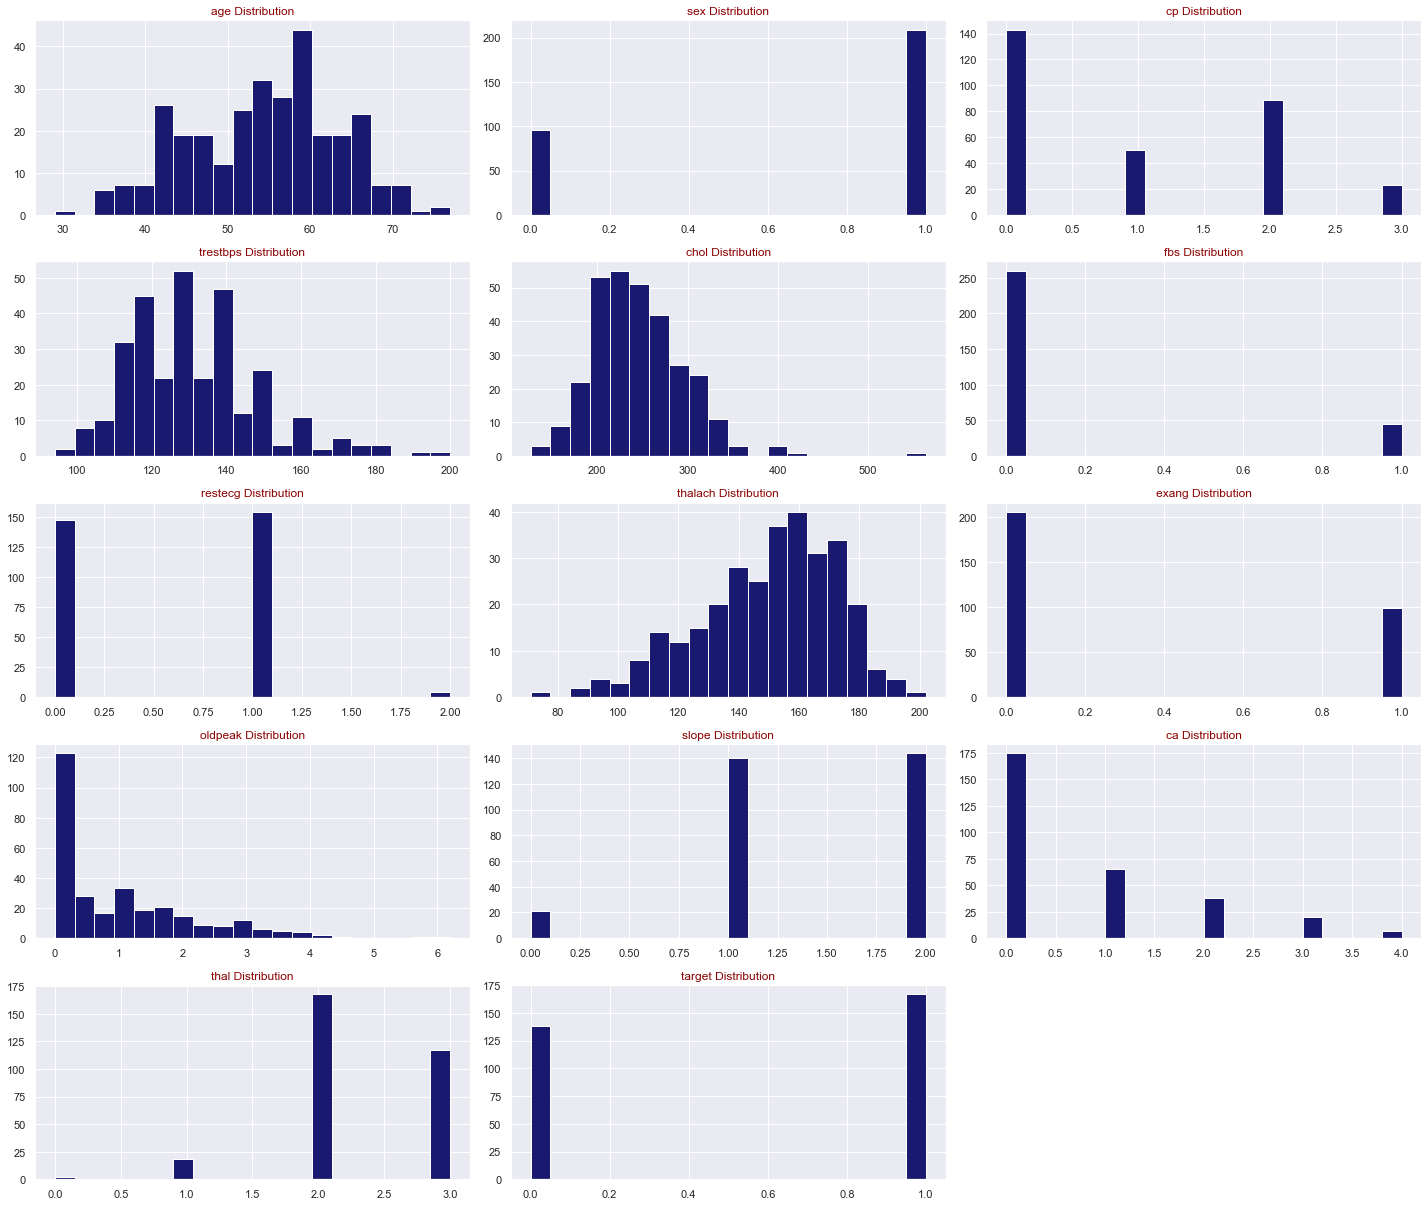

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [21]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,54.259016,0.685246,0.973770,131.665574,245.796721,0.147541,0.531148,149.800000,0.324590,1.032787,1.403279,0.750820,2.311475,0.547541
std,9.148364,0.465181,1.032036,17.487955,51.980240,0.355227,0.525514,22.907623,0.468991,1.160297,0.616112,1.052976,0.610785,0.498553
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Above lies all distribution plots. Also listed are all the description of all columns with min, mean, and max. Age has a minimum of 29 years, A mean of 54 years and 77 years for maximum age. 

In [22]:
corr_matrix=heart_df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.437171
thalach     0.425245
slope       0.349680
restecg     0.141856
fbs        -0.030449
chol       -0.092668
trestbps   -0.142296
age        -0.233141
sex        -0.275678
thal       -0.345859
ca         -0.359592
oldpeak    -0.433741
exang      -0.439033
Name: target, dtype: float64

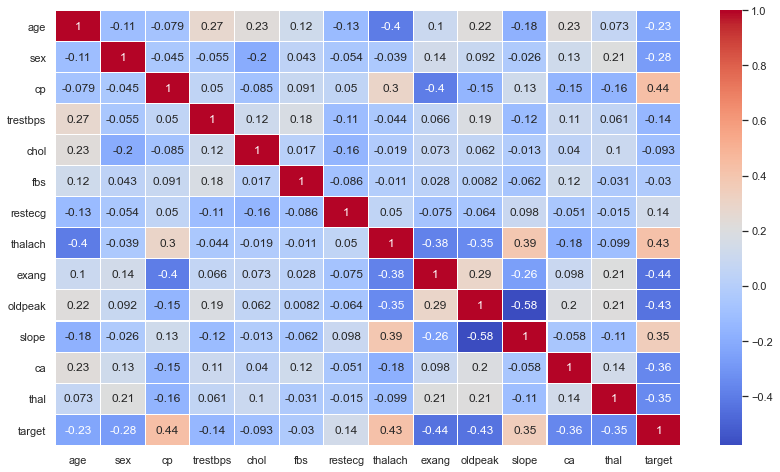

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(heart_df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Age and its relation to heart disease. Are young people more prone to heart disease?

In [24]:
age = heart_df['age']
target = heart_df['target']
corrolation = age.corr(target)
print(corrolation)

-0.23314073953058773


In [25]:
heart_df.groupby(['age']).agg(['count'])

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,count,count,count,count,count,count,count,count,count,count,count,count,count
age,,,,,,,,,,,,,
29,1,1,1,1,1,1,1,1,1,1,1,1,1
34,2,2,2,2,2,2,2,2,2,2,2,2,2
35,4,4,4,4,4,4,4,4,4,4,4,4,4
37,2,2,2,2,2,2,2,2,2,2,2,2,2
38,5,5,5,5,5,5,5,5,5,5,5,5,5
39,4,4,4,4,4,4,4,4,4,4,4,4,4
40,3,3,3,3,3,3,3,3,3,3,3,3,3
41,10,10,10,10,10,10,10,10,10,10,10,10,10


Younger people tend to have less chest pains, less cholostoral and less chance of having heart disease. People above 40 years old tend to be more prone to heart disease. At ages 57 and 58, we see all columns are at all time high and they are highly prone to heart disease.

In [26]:
correlation_df = heart_df.corr()
print(correlation_df)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.105227 -0.079412  0.272030  0.226159  0.124852   
sex      -0.105227  1.000000 -0.044661 -0.055035 -0.202497  0.043077   
cp       -0.079412 -0.044661  1.000000  0.049816 -0.085149  0.091345   
trestbps  0.272030 -0.055035  0.049816  1.000000  0.119095  0.176356   
chol      0.226159 -0.202497 -0.085149  0.119095  1.000000  0.016950   
fbs       0.124852  0.043077  0.091345  0.176356  0.016950  1.000000   
restecg  -0.125186 -0.053957  0.050033 -0.111612 -0.157760 -0.086373   
thalach  -0.404910 -0.039266  0.300458 -0.044089 -0.018980 -0.011319   
exang     0.103777  0.138123 -0.396921  0.065819  0.072747  0.027513   
oldpeak   0.217735  0.091707 -0.154211  0.190490  0.061507  0.008177   
slope    -0.177919 -0.026229  0.125331 -0.118721 -0.012736 -0.062338   
ca        0.228342  0.128125 -0.154357  0.105500  0.039999  0.124995   
thal      0.073230  0.207257 -0.164424  0.060906  0.102709 -0.03

In [27]:
heart_df.cp.corr(target)

0.4371711498181037

In [28]:
disease_yes = heart_df[(heart_df['target'] == 1)]

disease_no = heart_df[(heart_df['target'] == 0)]

In [29]:
# Our Skewness and Krutosis is well within range therefore we will continue with the T-test.
print(stats.describe(disease_yes['age']))
print(stats.describe(disease_no['age']))

DescribeResult(nobs=167, minmax=(29, 76), mean=52.32335329341317, variance=92.61770435033549, skewness=0.12870385259897552, kurtosis=-0.6626797396935062)
DescribeResult(nobs=138, minmax=(35, 77), mean=56.60144927536232, variance=63.39474240981699, skewness=-0.5425219384500629, kurtosis=0.08111820394037306)


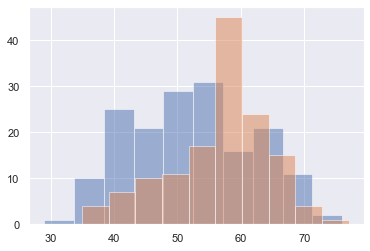

In [30]:
# looking at the age and heart disease distribution it looks normal.
plt.hist(disease_yes['age'], alpha = .5)
plt.hist(disease_no['age'], alpha = .5)
plt.show()

In [31]:
# statistic is above 1.96 and the p-value is below .05 we will continue with Confidence Invterval 
stats.ttest_ind(disease_no['age'], disease_yes['age'])

Ttest_indResult(statistic=4.1732588961761055, pvalue=3.9273919887110855e-05)

In [32]:
import math

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(disease_no['age'], disease_yes['age'])

'The difference in means at the 95% confidence interval (two-tail) is between -6.251748075066122 and -2.3044438888321777.'

[[Text(0, 0, 'disease_yes'), Text(0, 0, 'disease_no')]]

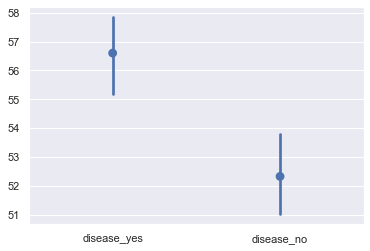

In [33]:
import seaborn as sns

g = sns.pointplot(data=[disease_no['age'],
                        disease_yes['age']], join=False)
                        
g.set(xticklabels = ['disease_yes', 'disease_no'])

Above is the age range on average compared to having heart disease. On average people who are about 52 years old and under tend to have less heart disease than those who are about 56 years and above. According to our visual inspection, ages are close enough to normally distributed for this reason we proceeded with the t-test. The 95% confidence interval suggests that the difference in the average age between heart disease and no heart disease is between 2 to 6 years.

# What does the chest pain type pie chart look like?

([<matplotlib.patches.Wedge at 0x7fa6f751ddc0>,
 [Text(0.10746647609377782, 1.0947378483070664, '0'),
  Text(-0.8262451362178279, -0.7261673187884341, '1'),
  Text(0.6046351239069353, -0.9189213061726478, '2'),
  Text(1.0692753863107642, -0.25816689995033476, '3')],
 [Text(0.05861807786933335, 0.597129735440218, '46.9%'),
  Text(-0.4506791652097243, -0.39609126479369133, '29.2%'),
  Text(0.3298009766765101, -0.5012298033668987, '16.4%'),
  Text(0.5832411198058713, -0.14081830906381892, '7.5%')])

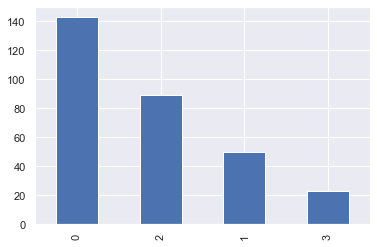

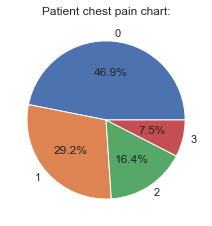

In [34]:
# Plot distribution of target variable which is the Churn column


heart_df['cp'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart
sizes = heart_df['cp'].value_counts(sort = True)
labels = np.unique(heart_df.cp)

# Visualize the data
plt.figure(figsize = (10,8))
plt.subplot(212)
plt.title("Patient chest pain chart:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Bar & pie plots below show that number of customers churned is less than half of not churned.

About 47% of people do not experience chest pain, about 30% do experience 1 chest pain, 16% experience 2, and about 8% experience 3 chest pains.

# What is the max heart rate achieved in non-heart disease patients?


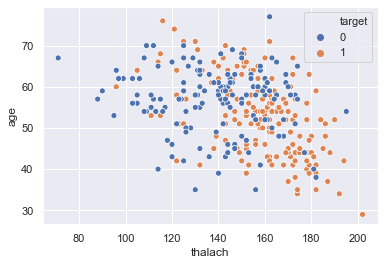

In [35]:
sns.scatterplot(data=heart_df, x="thalach", y="age", hue="target")

The maximum heart rate achieved in a person without heart disease is about 195 thalach around age 53. Perhaps this individual is unhealthy and is well on thier way to having heart issues in the near future.